<a href="https://colab.research.google.com/github/donnachou/Car-Selling-Prediction-Statistical-Analysis/blob/main/Car_Price_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Car_sales.csv to Car_sales (1).csv


In [ ]:
# using the Csv file
df = pd.read_csv('Car_sales.csv')

# removing index column
df = df.iloc[: , 1:]

# Checking the first 5 entries of dataset
df.head()

,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [ ]:
data = df

# Finding the missing values
data.isna().any()

# Finding if missing values
data.isnull().any()

,0
Model,False
Sales_in_thousands,False
__year_resale_value,True
Vehicle_type,False
Price_in_thousands,True
Engine_size,True
Horsepower,True
Wheelbase,True
Width,True
Length,True


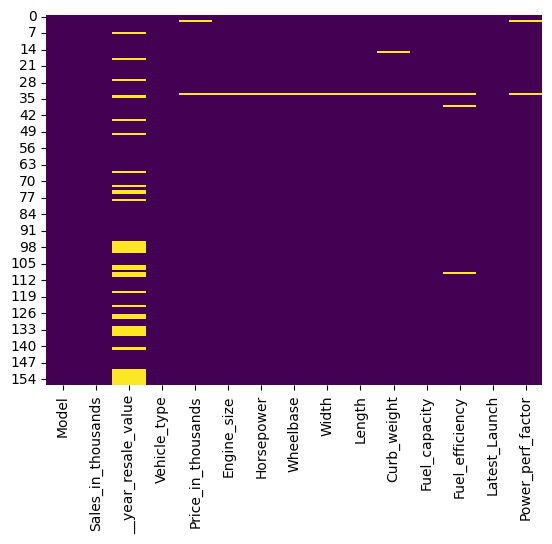

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()


In [ ]:
#using mean, median to fill for missing values
df.update(df[['Price_in_thousands', 'Engine_size']].fillna({
    'Price_in_thousands': df['Price_in_thousands'].mean(),
    'Engine_size': df['Engine_size'].median()
}))


In [ ]:
#ensuring no null values
print(df.isnull().sum())


Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      0
Engine_size             0
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64


In [ ]:
df['Fuel_efficiency'] = df['Fuel_efficiency'].interpolate()
df['Vehicle_type'] = df['Vehicle_type'].fillna('Unknown')
df['__year_resale_value'] = df['__year_resale_value'].fillna(df['Price_in_thousands'] * 0.8)


In [ ]:
# Using median for numeric columns
df['__year_resale_value'] = df['__year_resale_value'].fillna(df['__year_resale_value'].median())
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].median())
df['Wheelbase'] = df['Wheelbase'].fillna(df['Wheelbase'].median())
df['Width'] = df['Width'].fillna(df['Width'].median())
df['Length'] = df['Length'].fillna(df['Length'].median())
df['Curb_weight'] = df['Curb_weight'].fillna(df['Curb_weight'].median())
df['Fuel_capacity'] = df['Fuel_capacity'].fillna(df['Fuel_capacity'].median())
df['Fuel_efficiency'] = df['Fuel_efficiency'].fillna(df['Fuel_efficiency'].median())
df['Power_perf_factor'] = df['Power_perf_factor'].fillna(df['Power_perf_factor'].median())
df['Vehicle_type'] = df['Vehicle_type'].fillna(df['Vehicle_type'].mode()[0])
df['__year_resale_value'] = df['__year_resale_value'].fillna(df['Price_in_thousands'] * 0.8)


In [ ]:
#ensuring no null values
print(df.isnull().sum())

Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64


In [ ]:
df.describe()
data.dtypes

,0
Model,object
Sales_in_thousands,float64
__year_resale_value,float64
Vehicle_type,object
Price_in_thousands,float64
Engine_size,float64
Horsepower,float64
Wheelbase,float64
Width,float64
Length,float64


<ipython-input-43-27a704becda4>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Engine_size'].fillna(data['Engine_size'].median(), inplace=True)
<ipython-input-43-27a704becda4>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

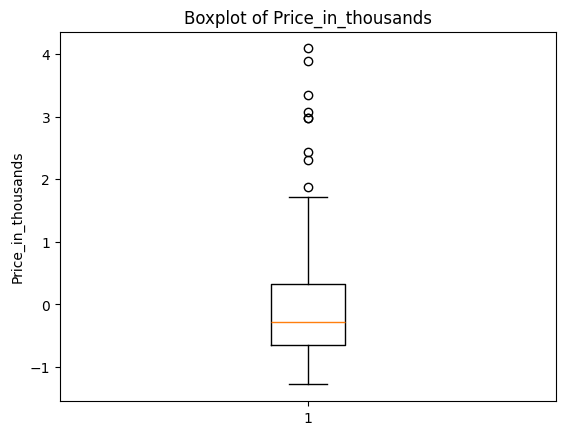

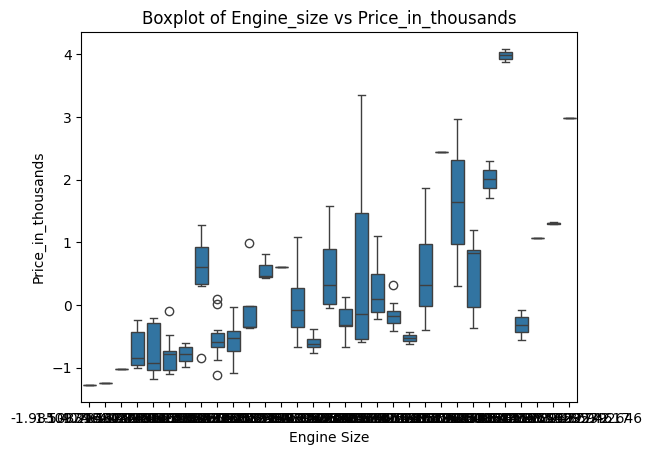

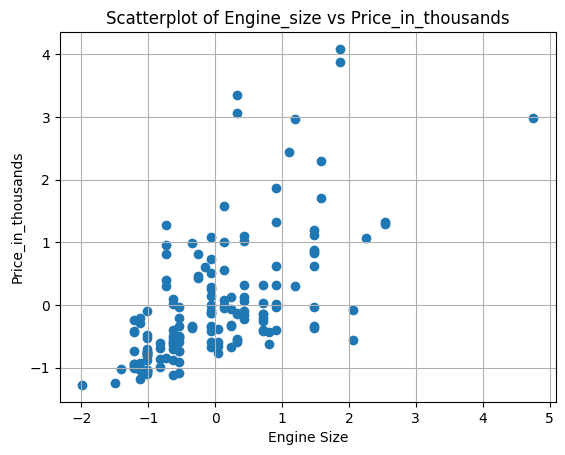

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame

# Step 1: Handle missing values before standardization
# For demonstration, let's use mean/median imputation, but you should adjust this as needed
data['Engine_size'].fillna(data['Engine_size'].median(), inplace=True)
data['Price_in_thousands'].fillna(data['Price_in_thousands'].median(), inplace=True)

# More columns can be filled similarly as per your data
# Example: Fill other numeric columns (adjust as necessary)
for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].median(), inplace=True)

# Step 2: Standardize the numeric columns without dropping any values/columns
# We select only numeric columns for standardization
numeric_columns = data.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Step 3: Visualization

# Box plot for Price_in_thousands to visualize distribution and detect outliers
plt.boxplot(data['Price_in_thousands'])
plt.title('Boxplot of Price_in_thousands')
plt.ylabel('Price_in_thousands')
plt.show()

# Using seaborn to create a box plot comparing Engine_size vs Price_in_thousands
sns.boxplot(x='Engine_size', y='Price_in_thousands', data=data)
plt.title('Boxplot of Engine_size vs Price_in_thousands')
plt.xlabel('Engine Size')
plt.ylabel('Price_in_thousands')
plt.show()

# Scatter plot to predict Price_in_thousands based on Engine_size
plt.scatter(data['Engine_size'], data['Price_in_thousands'])
plt.title('Scatterplot of Engine_size vs Price_in_thousands')
plt.xlabel('Engine Size')
plt.ylabel('Price_in_thousands')
plt.grid(True)
plt.show()


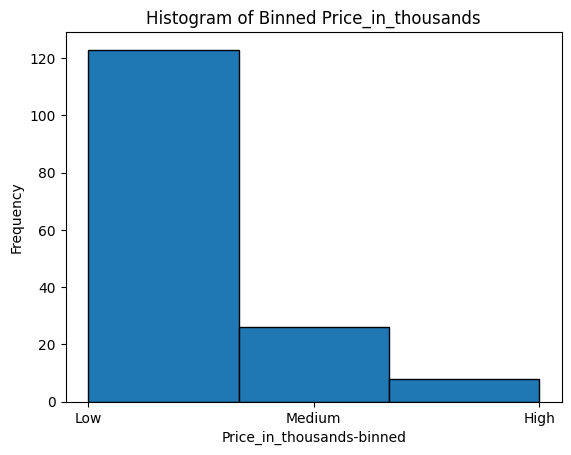

Price_in_thousands-binned
Low       123
Medium     26
High        8
Name: count, dtype: int64
     Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0  Integra           -0.532042            -0.286281    Passenger   
1       TL           -0.200761             0.011560    Passenger   
2       CL           -0.573406            -0.128251    Passenger   
3       RL           -0.654896             0.846193    Passenger   
4       A4           -0.480754             0.213228    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase     Width    Length  \
0           -0.414437    -1.214376   -0.814577  -0.827661 -1.121287 -1.119971   
1            0.071004     0.134385    0.694066   0.081122 -0.246689  0.416070   
2            0.000000     0.134385    0.694066  -0.076927 -0.159229  0.348634   
3            1.027816     0.423406    0.427835   0.937221  0.073997  0.693306   
4           -0.239256    -1.214376   -0.637089  -0.643270 -0.858907 -0.700370   

   Curb_we

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Step 1: Binning for Price_in_thousands
# Define the number of bins and the labels for them
bins = np.linspace(data['Price_in_thousands'].min(), data['Price_in_thousands'].max(), 4)  # 4 bins
group_names = ['Low', 'Medium', 'High']

# Apply binning and create a new column for the binned data
data['Price_in_thousands-binned'] = pd.cut(data['Price_in_thousands'], bins, labels=group_names, include_lowest=True)

# Step 2: Visualize the binned data

# Plotting the binned data distribution
plt.hist(data['Price_in_thousands-binned'], bins=3, edgecolor='black')
plt.title('Histogram of Binned Price_in_thousands')
plt.xlabel('Price_in_thousands-binned')
plt.ylabel('Frequency')
plt.show()

# You can also inspect the distribution of the bins in the dataset
print(data['Price_in_thousands-binned'].value_counts())

# Step 3: Check the first few rows to confirm
print(data.head())


In [ ]:
# Assuming your data has columns like 'Engine_size', 'Fuel_efficiency', and 'Price_in_thousands'
# Select relevant columns, update column names to match your dataset
data_grp = data[['Engine_size', 'Fuel_efficiency', 'Price_in_thousands']]

# Group by Engine_size and Fuel_efficiency, compute mean for Price_in_thousands
data_grp = data_grp.groupby(['Engine_size', 'Fuel_efficiency'], as_index=False).mean()

# Show the result
print(data_grp)


    Engine_size  Fuel_efficiency  Price_in_thousands
0     -1.985097         4.989967           -1.277326
1     -1.503397         1.690344           -1.244682
2     -1.407057         1.926031           -1.020535
3     -1.214376         0.747594           -0.337400
4     -1.214376         0.983282           -0.414437
..          ...              ...                 ...
85     2.061188        -1.609279           -0.316997
86     2.253868        -2.080654            1.074249
87     2.542888        -2.080654            1.325061
88     2.542888        -0.430843            1.288477
89     4.758711        -1.844967            2.978375

[90 rows x 3 columns]


Fuel_efficiency  -2.080654  -1.844967  -1.609279  -1.373592  -1.137905  \
Engine_size                                                              
-1.985097              NaN        NaN        NaN        NaN        NaN   
-1.503397              NaN        NaN        NaN        NaN        NaN   
-1.407057              NaN        NaN        NaN        NaN        NaN   
-1.214376              NaN        NaN        NaN        NaN        NaN   
-1.118036              NaN        NaN        NaN        NaN        NaN   
-1.021696              NaN        NaN        NaN        NaN        NaN   
-0.829016              NaN        NaN        NaN        NaN        NaN   
-0.732676              NaN        NaN        NaN        NaN        NaN   
-0.636336              NaN        NaN        NaN        NaN        NaN   
-0.539996              NaN        NaN  -0.909728        NaN  -0.732436   
-0.347315              NaN        NaN        NaN        NaN        NaN   
-0.250975              NaN        NaN 

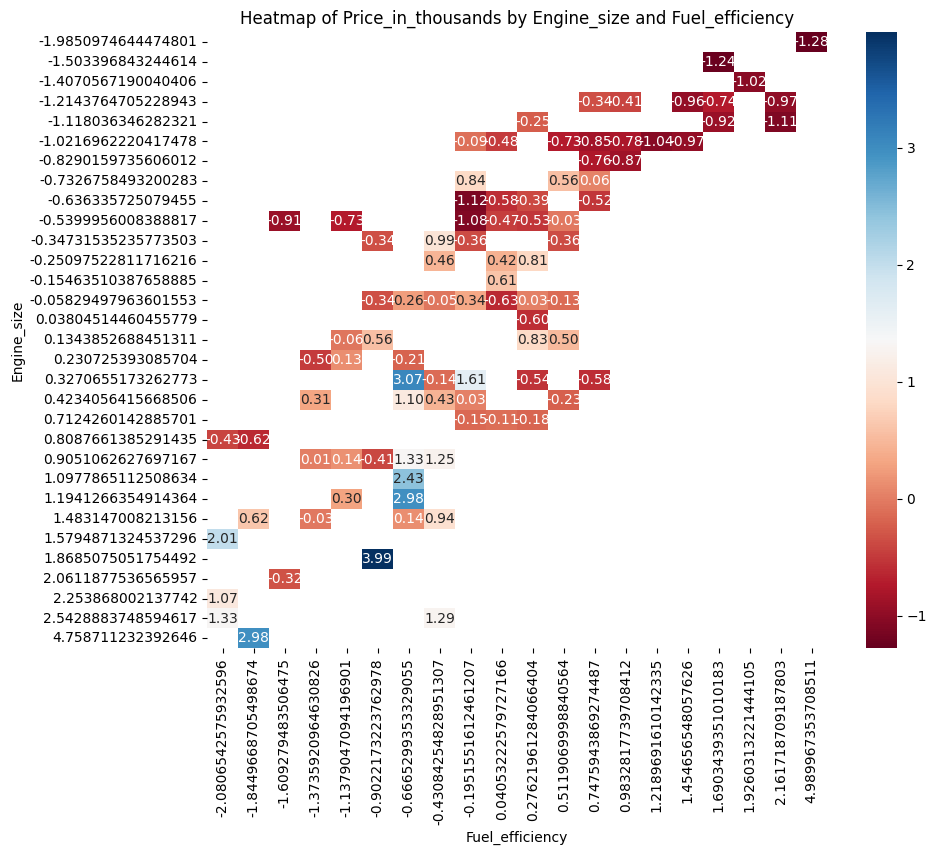

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Engine_size and Fuel_efficiency, compute mean for Price_in_thousands
data_grp = data[['Engine_size', 'Fuel_efficiency', 'Price_in_thousands']]
data_grp = data_grp.groupby(['Engine_size', 'Fuel_efficiency'], as_index=False).mean()

# Pivot the data: Index is 'Engine_size', columns are 'Fuel_efficiency', values are 'Price_in_thousands'
data_pivot = data_grp.pivot(index='Engine_size', columns='Fuel_efficiency', values='Price_in_thousands')

# Display the pivot table
print(data_pivot)

# Create a heatmap to visualize the data
plt.figure(figsize=(10, 8))
sns.heatmap(data_pivot, cmap='RdBu', annot=True, fmt='.2f')
plt.title('Heatmap of Price_in_thousands by Engine_size and Fuel_efficiency')
plt.xlabel('Fuel_efficiency')
plt.ylabel('Engine_size')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

# ANOVA - Analysis of Variance
# Let's group the data by Engine_size (or another categorical column if relevant)
# and perform ANOVA to compare the means of Price_in_thousands for each Engine_size group

data_annova = data[['Engine_size', 'Price_in_thousands']]  # Adjust columns
grouped_annova = data_annova.groupby(['Engine_size'])

# Example: Perform ANOVA for two specific engine sizes (e.g., 'small' and 'large')
# Replace these with actual values present in your Engine_size column.
# Here we are assuming two groups with sample engine sizes
annova_results_l = sp.stats.f_oneway(grouped_annova.get_group(2.0)['Price_in_thousands'],  # Example engine size group 1
                             grouped_annova.get_group(4.0)['Price_in_thousands'])   # Example engine size group 2

print('ANOVA Results:', annova_results_l)

# Interpretation:
# If the p-value is low (typically < 0.05), there is significant variance between the two groups.

# Correlation Analysis - between Engine_size and Price_in_thousands
sns.regplot(x='Engine_size', y='Price_in_thousands', data=data)
plt.ylim(0, )  # You can adjust the y-axis as per the range of Price_in_thousands
plt.title('Correlation between Engine Size and Price_in_thousands')
plt.xlabel('Engine Size')
plt.ylabel('Price in Thousands')
plt.grid(True)
plt.show()


<ipython-input-50-844c85389f24>:15: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  annova_results_l = sp.stats.f_oneway(grouped_annova.get_group(2.0)['Price_in_thousands'],  # Example engine size group 1
<ipython-input-50-844c85389f24>:15: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  annova_results_l = sp.stats.f_oneway(grouped_annova.get_group(2.0)['Price_in_thousands'],  # Example engine size group 1


KeyError: 2.0

[-1.21437647  0.13438527  0.42340564 -0.25097523  1.09778651 -0.5399956
  0.03804514  0.71242601  1.48314701 -0.05829498  2.54288837 -0.82901597
  0.32706552 -1.98509746 -0.34731535 -1.02169622  4.75871123  2.06118775
  0.80876614 -0.63633573  0.90510626 -1.40705672 -0.73267585 -1.50339684
  1.57948713  2.253868    0.23072539  1.19412664  1.86850751 -1.11803635
 -0.1546351 ]
[-1.21437647  0.13438527  0.42340564 -0.25097523  1.09778651 -0.5399956
  0.03804514  0.71242601  1.48314701 -0.05829498  2.54288837 -0.82901597
  0.32706552 -1.98509746 -0.34731535 -1.02169622  4.75871123  2.06118775
  0.80876614 -0.63633573  0.90510626 -1.40705672 -0.73267585 -1.50339684
  1.57948713  2.253868    0.23072539  1.19412664  1.86850751 -1.11803635
 -0.1546351 ]
Error: 1.8. Check the available Engine_size values.


<ipython-input-51-01fedc052eaa>:19: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_annova.get_group(1.8)['Price_in_thousands'],  # Replace with valid engine size group 1


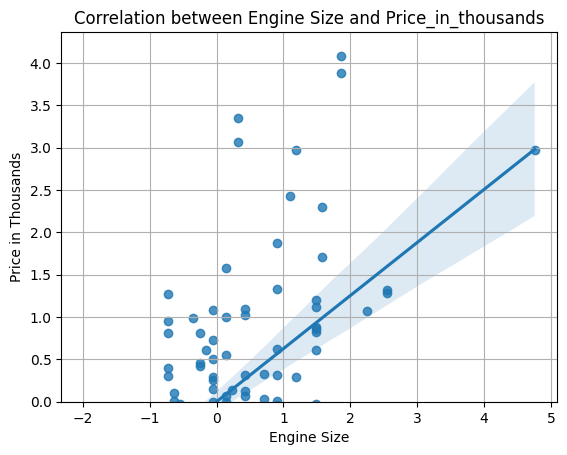

In [ ]:
print(data['Engine_size'].unique())
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Check the unique values in the Engine_size column to find valid groupings
print(data['Engine_size'].unique())

# Example: Replace 'small' and 'large' with actual values from your dataset
# For demonstration, let's assume your Engine_size has values like 1.8, 2.5, 3.0, etc.

# Group the data by Engine_size and Price_in_thousands
data_annova = data[['Engine_size', 'Price_in_thousands']]
grouped_annova = data_annova.groupby(['Engine_size'])

# Perform ANOVA with valid engine sizes (replace with actual engine size values)
try:
    annova_results_l = sp.f_oneway(
        grouped_annova.get_group(1.8)['Price_in_thousands'],  # Replace with valid engine size group 1
        grouped_annova.get_group(3.0)['Price_in_thousands']   # Replace with valid engine size group 2
    )
    print('ANOVA Results:', annova_results_l)
except KeyError as e:
    print(f"Error: {e}. Check the available Engine_size values.")

# Correlation Analysis - between Engine_size and Price_in_thousands
sns.regplot(x='Engine_size', y='Price_in_thousands', data=data)
plt.ylim(0, )  # You can adjust the y-axis as per the range of Price_in_thousands
plt.title('Correlation between Engine Size and Price_in_thousands')
plt.xlabel('Engine Size')
plt.ylabel('Price in Thousands')
plt.grid(True)
plt.show()
